# Importing Our libraries

In [1]:
import pandas as pd
import numpy as np

# Loading our data

In [2]:
Dataset = pd.read_csv('Salaries.csv')

# Basic Data Exploration

In [6]:
Dataset #Showing our Dataset

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
36159,36160,Gary Altenberg,"Lieutenant, Fire Suppression",128808.87,220909.48,13126.31,44430.12,362844.66,407274.78,2012,San Francisco
36160,36161,Gregory Suhr,Chief of Police,302578.00,0.00,18974.11,69810.19,321552.11,391362.30,2012,San Francisco
36161,36162,Khoa Trinh,Electronic Maintenance Tech,111921.00,146415.32,78057.41,53102.29,336393.73,389496.02,2012,San Francisco
36162,36163,Joanne Hayes-White,"Chief, Fire Department",296943.01,0.00,17816.59,72047.88,314759.60,386807.48,2012,San Francisco
36163,36164,Frederick Binkley,EMT/Paramedic/Firefighter,126863.19,192424.49,17917.18,44438.25,337204.86,381643.11,2012,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...
148645,148646,Carolyn A Wilson,Human Services Technician,0.00,0.00,0.00,0.00,0.00,0.00,2014,San Francisco
148647,148648,Joann Anderson,Communications Dispatcher 2,0.00,0.00,0.00,0.00,0.00,0.00,2014,San Francisco
148648,148649,Leon Walker,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,San Francisco
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,San Francisco


In [ ]:
Dataset.columns

In [ ]:
Dataset.isnull() #Showing the null values

In [ ]:
Dataset.isnull().sum() #Summing the Null values

In [4]:
Dataset = Dataset.drop(['Notes','Status'],axis=1,) #dropping the Null columns 

In [ ]:
Dataset.isnull().sum()

In [5]:
# Dropping the null rows (I basically dropped it because they were too many compared to the dataset, so using the mean or the mode would make the data less accurate)
Dataset = Dataset.dropna() 

In [ ]:
Dataset.isnull().sum() #as we can see there are no remaining null values

# Descriptive Statistics of the salaries

In [ ]:
Dataset.TotalPay.mean()

In [ ]:
Dataset.TotalPay.median()

In [ ]:
Dataset.TotalPay.mode()

In [ ]:
Dataset.TotalPay.min()

In [ ]:
Dataset.TotalPay.max()

In [ ]:
Dataset.TotalPay.std()

In [7]:
Dataset.describe() # describe the whole Dataset

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,111886.00000,111886.000000,111886.000000,111886.000000,111886.000000,111886.000000,111886.000000,111886.000000
mean,92327.01674,67207.558425,5266.322389,3654.897644,25114.344510,76128.778458,101243.122968,2013.012093
std,32543.14780,43417.689463,11764.540181,8038.682219,15372.790545,51269.681584,65248.814471,0.818020
min,36160.00000,-166.010000,-0.010000,-7058.590000,-13.800000,-618.130000,-618.130000,2012.000000
25%,64131.25000,33644.427500,0.000000,0.000000,12143.155000,37041.205000,49674.847500,2012.000000
50%,92109.50000,65547.035000,0.000000,820.630000,28697.845000,72628.810000,101967.740000,2013.000000
75%,120678.75000,95229.030000,4865.052500,4307.017500,35608.617500,107530.010000,142991.082500,2014.000000
max,148654.00000,319275.010000,220909.480000,342802.630000,96570.660000,471952.640000,510732.680000,2014.000000


# Plotting The data

In [8]:
import matplotlib.pyplot as plt

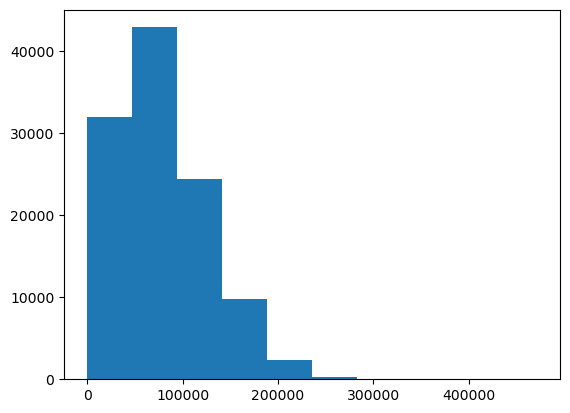

In [9]:
plt.hist(Dataset.TotalPay) # Histogram That represent the totalpay
plt.show()

In [10]:
counts = Dataset['JobTitle'].value_counts()

In [11]:
counts

Transit Operator                  6975
Special Nurse                     4382
Registered Nurse                  3725
Public Svc Aide-Public Works      2514
Police Officer 3                  2411
                                  ... 
Commissioner 16.700c, No Pay         1
Chief Investment Officer             1
Chief Forensic Toxicologist          1
Lieutenant (Police Department)       1
Cashier 3                            1
Name: JobTitle, Length: 1109, dtype: int64

In [12]:
Data = pd.DataFrame({'JobTitle': counts.index, 'Count': counts.values})

In [13]:
Data

,JobTitle,Count
0,Transit Operator,6975
1,Special Nurse,4382
2,Registered Nurse,3725
3,Public Svc Aide-Public Works,2514
4,Police Officer 3,2411
...,...,...
1104,"Commissioner 16.700c, No Pay",1
1105,Chief Investment Officer,1
1106,Chief Forensic Toxicologist,1
1107,Lieutenant (Police Department),1


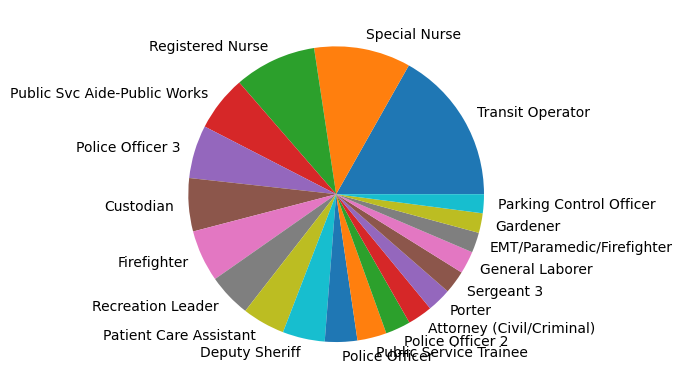

In [53]:
Data1 = Data.head(20)
plt.pie(Data1.Count,labels = Data1.JobTitle)
plt.show()

# Grouping our Data

In [15]:
Stats = Dataset.groupby('JobTitle')['TotalPay'].agg(['mean', 'median', 'min', 'max', 'std', 'count']).reset_index()

In [16]:
Stats

,JobTitle,mean,median,min,max,std,count
0,"ACPO,JuvP, Juv Prob (SFERS)",62290.780000,62290.780,62290.78,62290.78,NaN,1
1,ASR Senior Office Specialist,63519.363167,65824.065,15354.90,124469.21,15982.711217,60
2,ASR-Office Assistant,41511.501951,46930.610,7898.88,57186.13,15230.019656,41
3,Account Clerk,43145.753774,52891.030,0.00,64275.68,17729.839875,265
4,Accountant I,62036.101250,67403.330,19919.23,71605.00,17287.340334,8
...,...,...,...,...,...,...,...
1104,Wire Rope Cable Maint Sprv,203033.720000,193691.790,190575.90,224833.47,18943.310631,3
1105,Worker's Comp Supervisor 1,70389.297143,92558.110,56.64,108810.03,38380.304769,14
1106,Worker's Compensation Adjuster,73249.269865,80348.540,1837.39,106050.66,20057.372880,74
1107,X-Ray Laboratory Aide,50823.942700,60047.290,1007.00,99812.97,24170.083004,100


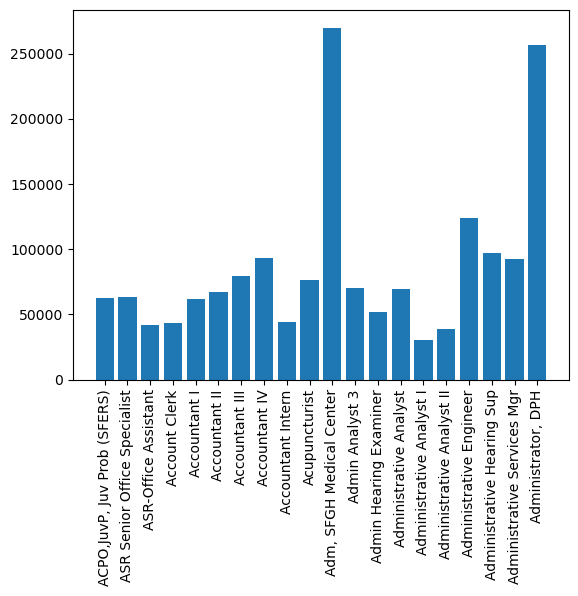

In [36]:
Stats1 = Stats.head(20)
plt.bar(Stats1['JobTitle'],Stats1['mean'])
plt.xticks(rotation ='vertical')
plt.show()

# The correlation between the TotalPay and The BasePay

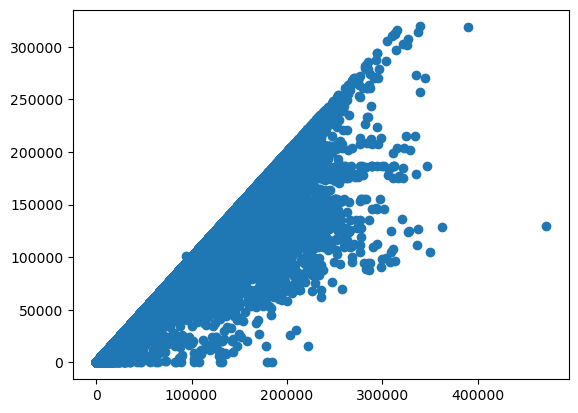

In [37]:
plt.scatter(Dataset.TotalPay,Dataset.BasePay)
plt.show()